# <EDA, 모델 수정 2>

## 0.준비

이번 Study2에서는 지난 학습에서 다루었던 EDA 탐색적 자료 분석을 이어서 진행합니다.

따라서 지난 학습에서의 데이터 전처리 부분까지가 사전 준비 단계입니다.

EDA(Exploratory Data Analysis, 탐색적 자료 분석)란 수집한 데이터를 분석하기 전에 데이터의 특성을 관찰하고 이해하는 단계입니다.

- **탐색적 자료 분석**

  > 1) 데이터 수집
  >
  > 2) 시각화 탐색
  >
  > 3) 패턴 도출
  >
  > 4) 인사이트 발굴

- **EDA 하는 법**

  > 1) Target을 주인공으로 (Study1)
  >
  > **2) Feature를 주인공으로 (Study2)**
  >
  > **3) Target과 Feature의 관계 (Study2)**

  ![image](https://user-images.githubusercontent.com/91044039/169638324-8f6ff069-91ff-45c6-81c0-6f9114cfcec2.png)

  \* 지난 Study1에서는 Target을 주인공으로 한 EDA 진행했습니다.  
  \* 이번에는 Feature를 주인공으로 한 EDA와 Target과 Feature의 관계에 관한 EDA를 진행해봅시다.

#### 패키지 설치

분석을 시작하기 전, 필요한 패키지를 설치합니다.

- 한글 폰트 적용
  - 아래 셀 실행 후 런타임 다시 시작, 런타임 모두 실행

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,601 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

#### 코랩에서 구글 드라이브 사용하기
  
 - 구글 드라이브 마운트 -> 구글 계정 연동

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 라이브러리 import

분석에 사용할 패키지들을 import 명령어로 불러옵니다.

In [2]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# 한글 폰트를 사용하기 위한 코드
plt.rc("font", family="NanumBarunGothic")

### 데이터 로드

먼저 pandas 라이브러리의 `read_csv()` 함수를 이용해 분석에 사용할 데이터를 불러옵니다.

`read_csv()` 함수는 ('파일이 있는 위치/파일명.확장자명') 의 형식을 받아 데이터를 불러옵니다.

**파일이 저장되어 있는 위치(경로)와 폴더명(이름)은 각자 다를 수 있습니다. 자신이 저장한 위치(경로)와 폴더명(이름)으로 수정하여 진행해주세요!**

In [3]:
# train 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/구내식당/train.csv")

# test 데이터 불러오기
test = pd.read_csv("/content/drive/MyDrive/구내식당/test.csv")

# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

### 데이터 전처리

Study1에서의 데이터 전처리까지가 준비 단계입니다.



- train 데이터 전처리
  - 석식 이용자 수가 0인 날 삭제
  - 요일 숫자로 변경  (월:1, 화:2, 수:3, 목:4, 금:5)
  - 일자 칼럼으로부터 월, 일 정보를 추출하여 새로운 칼럼 추가 (월 칼럼, 일 칼럼)

In [4]:
# 석식 이용 인원 0인 날 삭제
train = train[train["석식계"] != 0]

# 요일 숫자로 변경
train.loc[train["요일"] == "월", "요일"] = 1
train.loc[train["요일"] == "화", "요일"] = 2
train.loc[train["요일"] == "수", "요일"] = 3
train.loc[train["요일"] == "목", "요일"] = 4
train.loc[train["요일"] == "금", "요일"] = 5

# 월 칼럼 추가
def month(text: str):
    return int(text[5:7])


train["월"] = train["일자"].map(month)

# 일 칼럼 추가
def day(text: str):
    return int(text[-2:])


train["일"] = train["일자"].map(day)

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5


- test 데이터 전처리
  - 요일 숫자로 변경  (월:1, 화:2, 수:3, 목:4, 금:5)
  - 일자 칼럼으로부터 월, 일 정보를 추출하여 새로운 칼럼 추가 (월 칼럼, 일 칼럼)

In [5]:
# 요일 숫자로 변경
test.loc[test["요일"] == "월", "요일"] = 1
test.loc[test["요일"] == "화", "요일"] = 2
test.loc[test["요일"] == "수", "요일"] = 3
test.loc[test["요일"] == "목", "요일"] = 4
test.loc[test["요일"] == "금", "요일"] = 5

# 월 칼럼 추가
test["월"] = test["일자"].map(month)

# 일 칼럼 추가
test["일"] = test["일자"].map(day)

test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,일
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1,27
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1,28
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1,29
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2,1
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2,2


## 1.EDA

### 1) feature를 주인공으로

인원 정보(본사정원수, 휴가자수, 출장자수, 시간외근무승인건수, 재택근무자수)를 시각화하여 살펴봅니다.



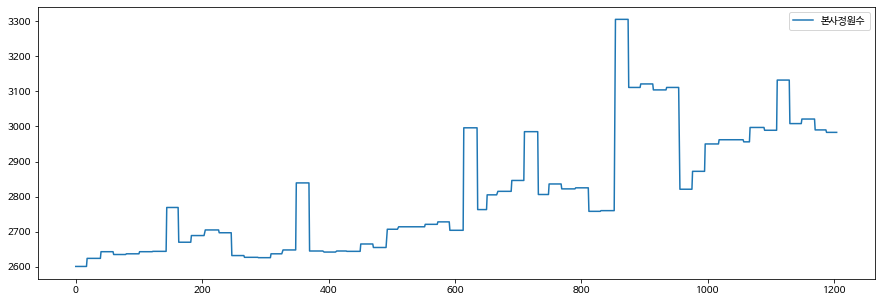

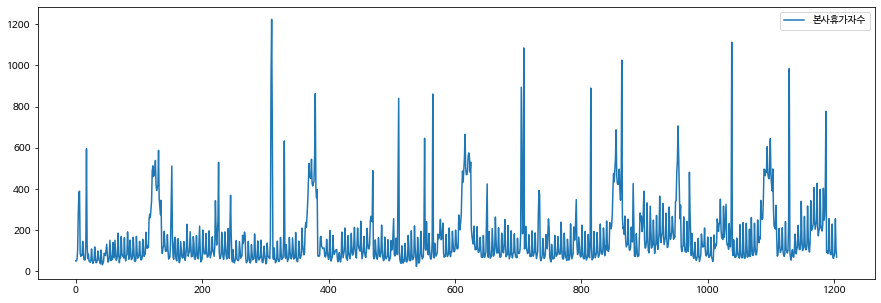

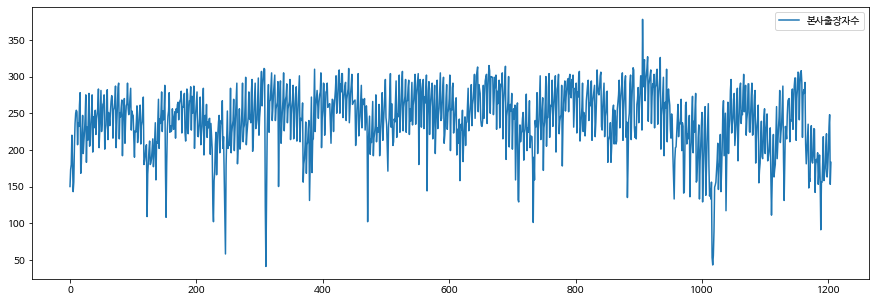

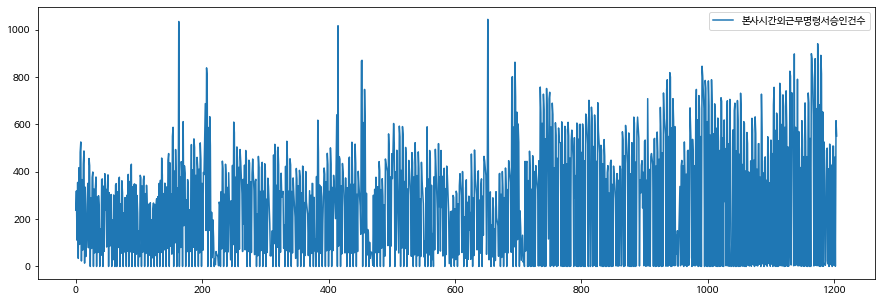

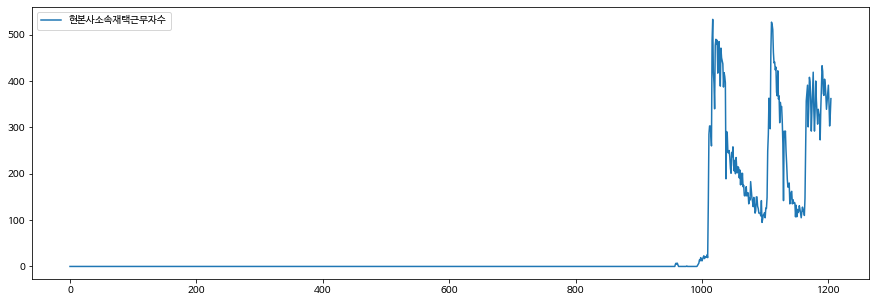

In [6]:
train[["본사정원수"]].plot(figsize=(15, 5))
plt.show()

train[["본사휴가자수"]].plot(figsize=(15, 5))
plt.show()

train[["본사출장자수"]].plot(figsize=(15, 5))
plt.show()

train[["본사시간외근무명령서승인건수"]].plot(figsize=(15, 5))
plt.show()

train[["현본사소속재택근무자수"]].plot(figsize=(15, 5))
plt.show()

어떤 특징을 발견했나요?
- 본사정원수는 지속적으로 우상향
- 휴가자수는 연휴 전후로 급등
- 출장자수는 특이 패턴 없음
- 시간외근무승인건수, 야근하는 사람 수 특이 패턴 있음
- 재택근무자수 특정일 기준 발생

#### a) 재택근무 발생 원인

- 코로나의 영향 (2020년 이후)

  이번 구내식당 데이터는 일자가 순차적으로 배열된 데이터로 시계열 데이터(time series)입니다.

  재택근무자수 시각화 자료에서 특정일 기준으로 발생되었다는 것을 알 수 있습니다.

  \* 재택근무자수가 100초과인 날을 확인해볼까요?

In [7]:
train[train["현본사소속재택근무자수"] > 100]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
1010,2020-03-20,5,2950,176,263,3,135.0,모닝롤/허니브레드 우유/주스 계란후라이 야채죽/쌀밥 (쌀:국내산) 꽃게탕 (오징어...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 갈비탕 (갈비:호주산) 칠리새우 감자채볶음 ...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 건새우아욱국 치즈함박스테이크 (돈육:국내,수...",627.0,358.0,3,20
1011,2020-03-23,1,2950,109,178,687,285.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 감자국 꽈리고추...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국 오리양념불고기*쌈무 (오리:국내산)...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼 한식...",1110.0,651.0,3,23
1012,2020-03-24,2,2950,131,137,639,303.0,모닝롤/햄치즈샌드 우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 쑥국 수제어묵볶...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...",오므라이스 (쌀:국내산) 가쯔오장국 돈육고구마강정 (돈육:국내산) 과일플레인샐러드...,1083.0,754.0,3,24
1013,2020-03-25,3,2950,122,146,1,303.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 피홍합탕 감...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국 목살스테이크 (목살:국내산) 파...",찹쌀밥 장각닭죽 생야채*쌈짱 오렌지 하루야채주스 포기김치,1022.0,526.0,3,25
1014,2020-03-26,4,2950,133,133,584,288.0,모닝롤/바나나샌드 우유/주스 계란후라이 새송이죽/쌀밥 (쌀:국내산) 버섯매운탕 (...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국 제육볶음 (돈육:국내산) 계란찜 ...","멸치주먹밥 (쌀,현미흑미:국내산) 우동 해물까스*와사비소스 꽃맛살샐러드 무피클...",955.0,645.0,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25


2020년 3월부터 재택근무자수가 100명을 넘었네요.

시기상 코로나19로 인한 재택근무 전환이 원인으로 보입니다.

#### b) 본사 시간 외 근무 이상치 발생 원인

- 수요일과 금요일에 일종의 야근 없는 날 존재

  본사시간외근무명령서승인건수 칼럼은 0인 값들이 존재했는데요.

  이는 야근한 사람이 없다는 것을 의미합니다.

  석식계 값이 0인 날이 수요일이 많았던 것을 고려해서 야근 없는 날을 요일별로 살펴보겠습니다.

In [8]:
train[train["본사시간외근무명령서승인건수"] == 0]["요일"].value_counts()

3    148
5     34
Name: 요일, dtype: int64

야근 없는 날은 수요일(3)과 금요일(5)뿐이네요!

수요일이 148번으로 가장 많고 금요일은 34번입니다.

이 데이터를 bar 막대 그래프로 시각화해봅시다.

- 요일별 야근 없는 날

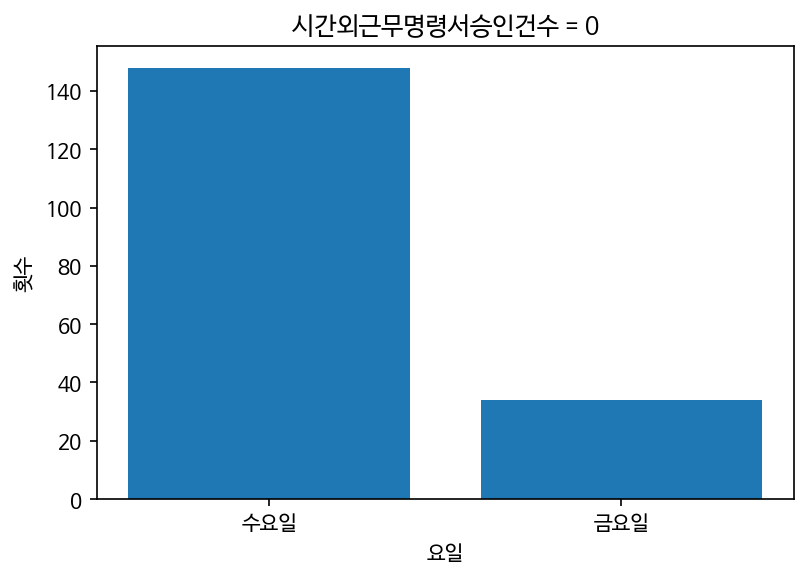

In [9]:
x = ["수요일", "금요일"]
y = train[train["본사시간외근무명령서승인건수"] == 0].value_counts("요일").values

plt.figure(dpi=150)

plt.title("시간외근무명령서승인건수 = 0")
plt.xlabel("요일")
plt.ylabel("횟수")

plt.bar(x, y)
plt.show()

앞서 value_counts()로 수요일:148, 금요일:34를 확인했는데요.

막대 그래프로 시각화하니 한눈에 볼 수 있어 좋네요!

### 2) feature와 target의 상관관계

Study1에서는 target을 주인공으로, Study2에서는 feature를 주인공으로 각각 EDA를 진행했습니다.

이제 마지막 EDA로 feature와 target의 상관관계를 알아봅시다!



#### a) 중식계와 feature의 상관관계

중식계를 기준으로 오름차순 정렬하여 인원정보를 얻습니다.

In [10]:
train.sort_values(by="중식계")[
    ["본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수", "중식계"]
]

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계
705,2846,894,159,26,0.0,296.0
469,2665,240,260,55,0.0,311.0
709,2846,1085,132,28,0.0,332.0
1129,3132,985,188,81,142.0,358.0
310,2637,1224,41,45,0.0,383.0
...,...,...,...,...,...,...
986,2872,74,196,722,0.0,1370.0
495,2707,76,213,560,0.0,1372.0
1188,2983,92,91,490,340.0,1405.0
490,2655,70,192,454,0.0,1417.0


reset_index() 함수로 0부터 순차적으로 새롭게 인덱스를 부여합니다.

\* 시각화를 할 때 기본적으로 인덱스 정보를 x축으로 사용하기 때문에 중식계의 오름차순 정렬을 시각화하기 위함입니다.

In [11]:
train.sort_values(by="중식계")[
    ["본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수", "중식계"]
].reset_index(drop=True)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계
0,2846,894,159,26,0.0,296.0
1,2665,240,260,55,0.0,311.0
2,2846,1085,132,28,0.0,332.0
3,3132,985,188,81,142.0,358.0
4,2637,1224,41,45,0.0,383.0
...,...,...,...,...,...,...
1157,2872,74,196,722,0.0,1370.0
1158,2707,76,213,560,0.0,1372.0
1159,2983,92,91,490,340.0,1405.0
1160,2655,70,192,454,0.0,1417.0


중식계 기준으로 오름차순 정렬된 인원정보를 시각화하여 살펴봅시다!

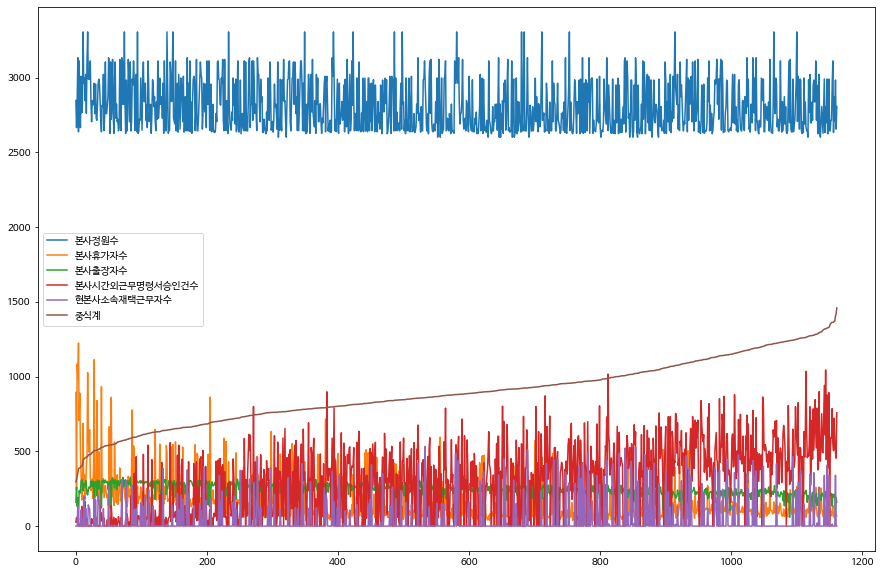

In [12]:
train.sort_values(by="중식계")[
    ["본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수", "중식계"]
].reset_index(drop=True).plot(figsize=(15, 10))
plt.show()

일단 본사정원수(파란색)는 중식계와 관계가 없어 보입니다.

나머지 칼럼들은 하나씩 상관관계를 살펴보도록 하죠!

##### 출장자수

중식계의 증가는 출장자수에 영향을 미칠까요?

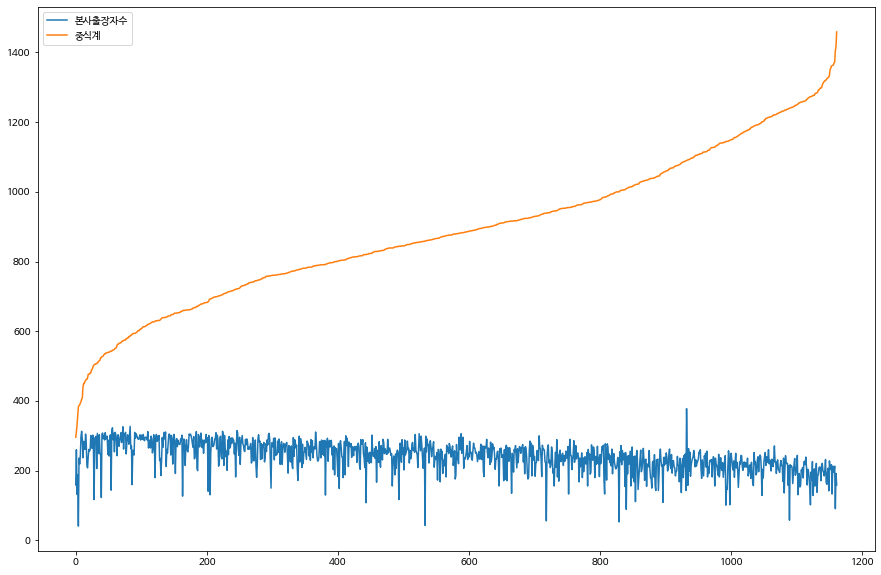

In [13]:
train.sort_values(by="중식계")[["본사출장자수", "중식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)
plt.show()

중식계가 증가할수록 출장자수가 감소하는 것이 보입니다.

출장을 하면 외부에서 식사를 해결하는 경우가 많아서 출장자수가 많을 때 중식계가 적은거겠죠?

##### 휴가자수

중식계의 증가는 휴가자수에 영향을 미칠까요?

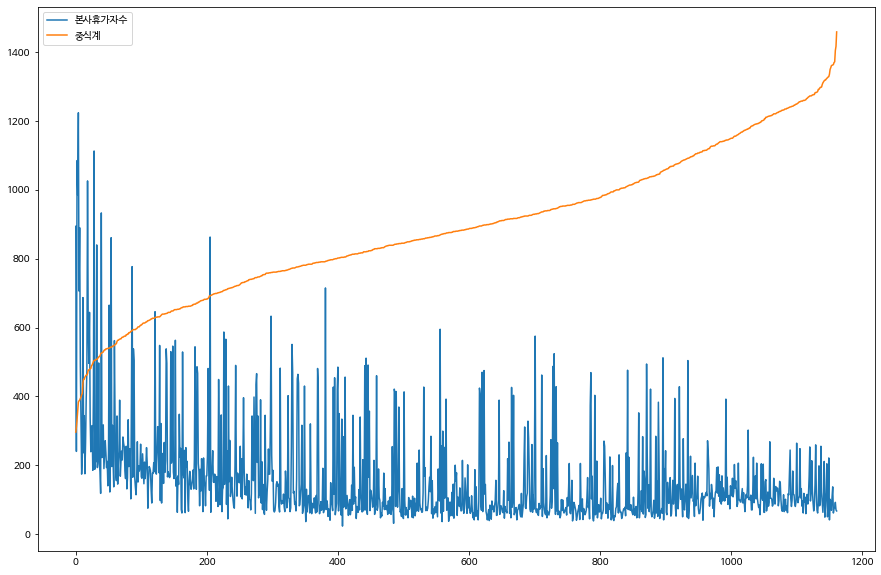

In [14]:
train.sort_values(by="중식계")[["본사휴가자수", "중식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)
plt.show()

중식계가 증가할수록 휴가자수가 감소하는 것이 보입니다.

휴가자수가 적으면 회사에 출근할테니 자연스레 중식계가 증가하는 거겠죠?

##### 현재원

= 본사정원수 - 휴가자수 - 출장자수 - 재택근무자수

\* 현재원은 현재 회사에서 일하고 있는 직원의 수를 의미합니다.

- 현재원 칼럼 추가

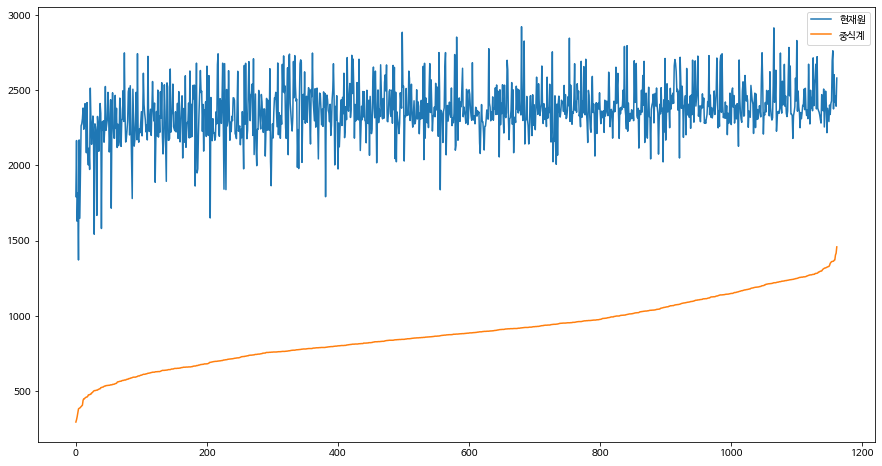

In [15]:
train["현재원"] = train["본사정원수"] - train["본사휴가자수"] - train["본사출장자수"] - train["현본사소속재택근무자수"]
train.sort_values(by="중식계")[["현재원", "중식계"]].reset_index(drop=True).plot(figsize=(15, 8))
plt.show()

기존 인원 정보를 사용하여 새롭게 얻은 현재원 정보는 중식계와 유사한 기울기로 증가하는 형태를 보입니다.

현재원 칼럼을 분석에 사용할 수 있겠네요!

#### b) 석식계와 feature의 상관관계

석식계와 feature의 상관관계 확인도 중식계와 유사하게 진행합니다.

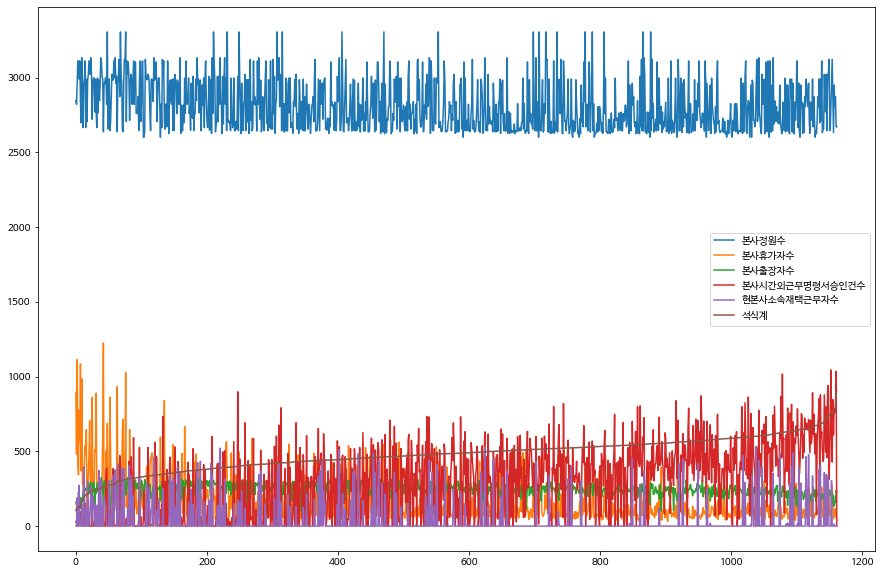

In [16]:
train.sort_values(by="석식계")[
    ["본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수", "석식계"]
].reset_index(drop=True).plot(figsize=(15, 10))
plt.show()

본사정원수는 석식계와도 상관 관계가 없는 것으로 보이네요.

나머지 칼럼들도 하나씩 살펴봅시다.

##### 시간외근무(=야근)

석식계의 증가는 시간외근무자수에 영향을 미칠까요?

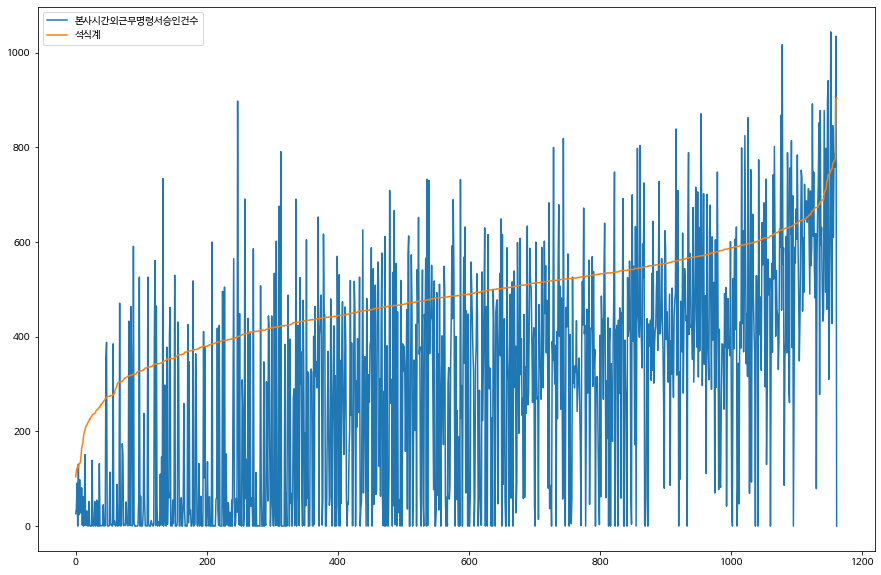

In [17]:
train.sort_values(by="석식계")[["본사시간외근무명령서승인건수", "석식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)

시간외근무자수가 증가할수록 석식계가 증가하는 것이 보입니다.

아무래도 저녁에 구내식당을 이용하는 사람들은 주로 야근을 하는 사람들이겠죠?

##### 현재원

= 본사정원수 - 휴가자수 - 출장자수 - 재택근무자수

\* 현재원은 현재 회사에서 일하고 있는 직원의 수를 의미합니다.


앞에서 추가했던 현재원 칼럼 정보는 중식계와 상관관계가 있는 것으로 보였는데요.

석식계도 현재원과의 관계가 있을까요?

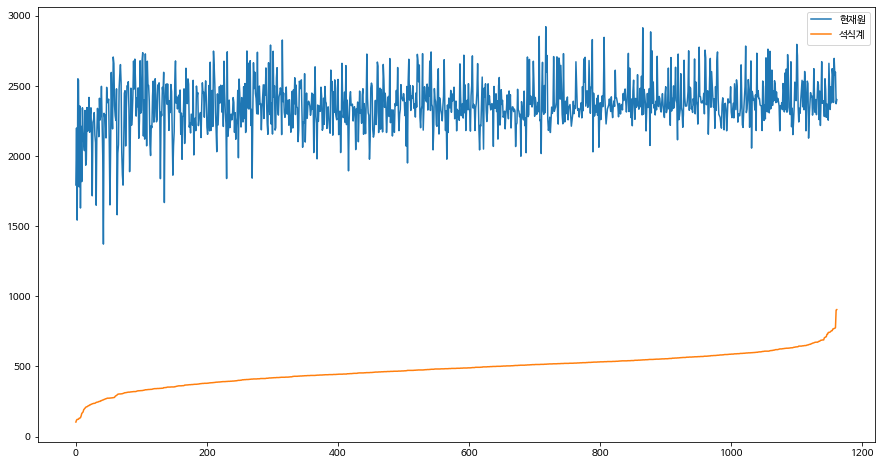

In [18]:
# train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']
train.sort_values(by="석식계")[["현재원", "석식계"]].reset_index(drop=True).plot(figsize=(15, 8))
plt.show()

석식계 역시 현재원과 유사한 기울기로 증가하는 것이 보입니다.

현재원 칼럼을 분석에 사용하면 모델 성능이 좋아지지 않을까요?

#### c) 중식계와 석식계의 상관관계

이번 구내식당 데이터는 Target이 2개이므로 target 간 상관관계도 살펴보겠습니다!

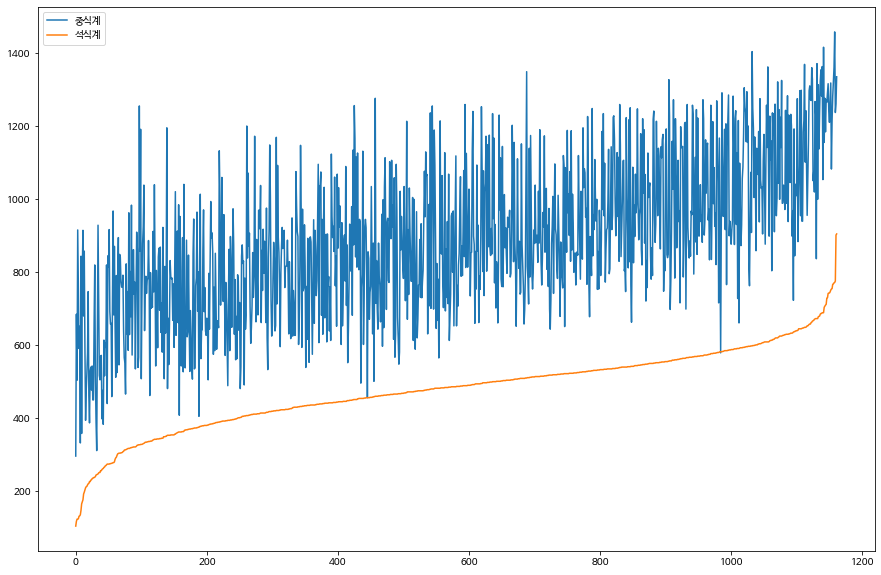

In [19]:
train.sort_values(by="석식계")[["중식계", "석식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)

중식계와 석식계는 비례관계로 볼 수 있겠네요!

다만 중식계가 증가할수록 석식계가 증가하는 것이 아니라 석식계가 증가하면 중식계가 증가하는 것이겠죠?

### 3) EDA, 인사이트 정리

##### \<Study1>

- **휴가자수** - 중식계 이상치 발생 원인  
  test셋에 존재하는 데이터이므로 예측 가능
- **자기계발의 날** - 석식계 이상치 발생 원인  
  test셋에 존재하지 않은 데이터이므로 예측 불가능
  - 석식계 이용자수가 0인 날 삭제
- **월별, 일별, 요일별** 다른 분포  
  - 데이터에 월, 일 칼럼 추가
  - 요일 칼럼 전처리

##### \<Study2>
- **본사정원자수** - Target과 관계가 없지만, 현재원을 계산할 수 있다.
- **현재원** 칼럼 추가 = 본사정원자수 - 휴가자수 - 출장자수 - 시간외근무자수

- **중식계**와 **휴가자수, 출장자수**는 반비례 관계
- **석식계**와 **시간외근무(=야근)자수**는 비례 관계
- **중식계**와 **석식계**는 비례 관계

## 2.EDA를 통해 도출한 인사이트

- 본사정원수는 Target과 관계가 없다.

- 본사정원수는 현재원으로 활용 가능하다.

- 중식계는 휴가자수와 출장자수와 관계가 있다.

- 석식계는 시간외근무자수와 관계가 있다.

- 중식계와 석식계는 상관관계가 있다.

### 1) 본사정원수는 target과 관계가 없다

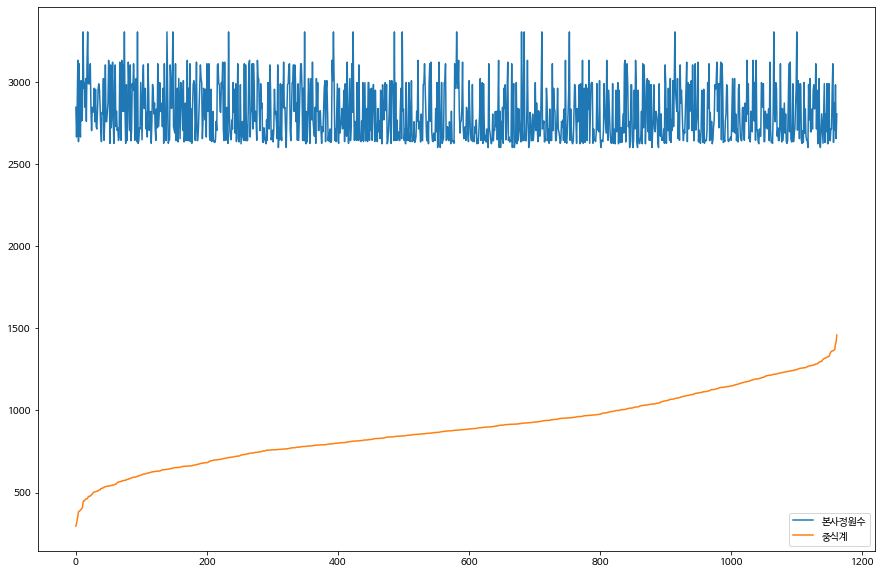

In [20]:
train.sort_values(by="중식계")[["본사정원수", "중식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)
plt.show()

### 2) 본사정원수는 현재원으로 활용 가능

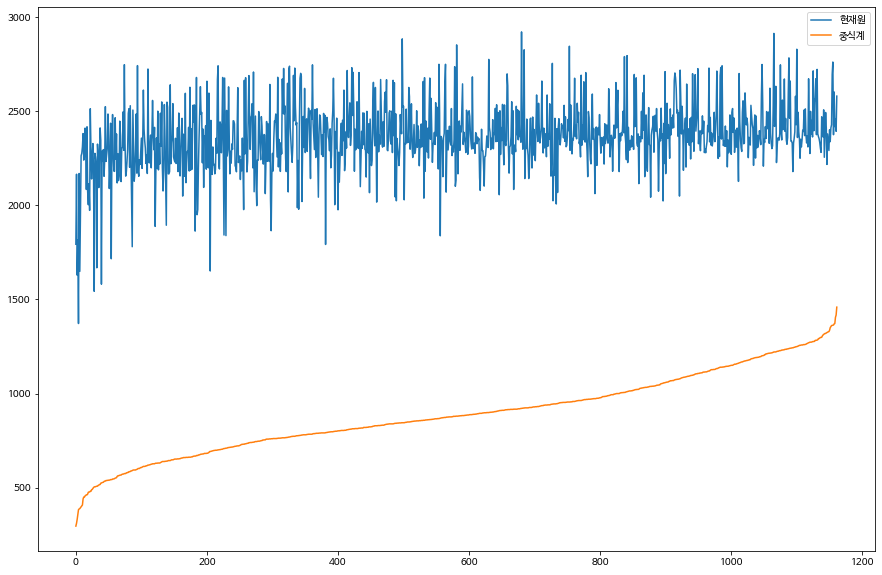

In [21]:
train["현재원"] = train["본사정원수"] - train["본사휴가자수"] - train["본사출장자수"] - train["현본사소속재택근무자수"]
train.sort_values(by="중식계")[["현재원", "중식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)
plt.show()

### 3) 중식계와 석식계는 상관관계가 있다

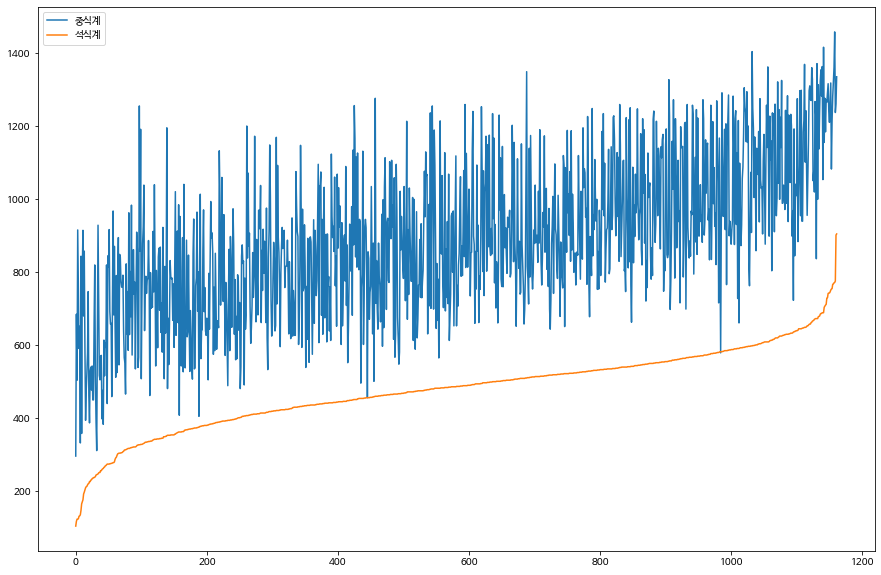

In [22]:
train.sort_values(by="석식계")[["중식계", "석식계"]].reset_index(drop=True).plot(
    figsize=(15, 10)
)

## 3.인사이트를 바탕으로 모델 수정

In [23]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,현재원
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1,2401.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2,2378.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3,2365.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4,2277.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20,2319.0
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21,2309.0
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22,2177.0
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25,2396.0


\<Study1>에서 달라진 점은 본사정원수 대신 현재원 칼럼을 features로 선택했네요!

In [24]:
# 학습에 사용될 칼럼 정보
features = ["요일", "월", "일", "현재원", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수"]

# 모델 학습에 사용될 데이터
train[features]

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,2,1,2401.0,50,150,238,0.0
1,2,2,2,2378.0,50,173,319,0.0
2,3,2,3,2365.0,56,180,111,0.0
3,4,2,4,2277.0,104,220,355,0.0
4,5,2,5,2142.0,278,181,34,0.0
...,...,...,...,...,...,...,...,...
1200,3,1,20,2319.0,75,198,4,391.0
1201,4,1,21,2309.0,92,231,462,351.0
1202,5,1,22,2177.0,255,248,1,303.0
1203,1,1,25,2396.0,107,153,616,327.0


test 데이터를 불러옵니다.

In [25]:
# test에는 현재원 없음
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,일
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1,27
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1,28
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1,29
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2,1
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2,2
5,2021-02-03,3,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치,2,3
6,2021-02-04,4,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치,2,4
7,2021-02-05,5,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치,2,5
8,2021-02-08,1,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치,2,8
9,2021-02-09,2,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지,2,9


현재원 칼럼을 train 데이터에서만 추가했었습니다.

test 데이터에도 현재원 칼럼을 추가하겠습니다.

In [26]:
# 현재원 칼럼 추가
test["현재원"] = test["본사정원수"] - test["본사휴가자수"] - test["본사출장자수"] - test["현본사소속재택근무자수"]

# 모델 예측에 사용될 데이터
test[features]

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,3,1,27,2355.0,88,182,5,358.0
1,4,1,28,2319.0,104,212,409,348.0
2,5,1,29,2170.0,270,249,0,294.0
3,1,2,1,2340.0,108,154,538,322.0
4,2,2,2,2362.0,62,186,455,314.0
5,3,2,3,2380.0,59,199,5,286.0
6,4,2,4,2364.0,61,211,476,288.0
7,5,2,5,2247.0,169,252,0,256.0
8,1,2,8,2333.0,88,174,690,329.0
9,2,2,9,2318.0,94,183,542,329.0


### 1) 중식계 예측 모델

In [27]:
# 독립변수X와 종속변수y 지정
X = train[features]
y = train["중식계"]

from sklearn.tree import DecisionTreeRegressor

# 모델 선언
lunch_model = DecisionTreeRegressor()

# 모델 학습
lunch_model.fit(X, y)

# 학습된 모델로 예측
lunch_count_predict = lunch_model.predict(test[features])

### 2) 석식계 예측 모델

EDA를 통해 도출한 인사이트에서 중식계와 석식계가 관계가 있다는 것을 기억하시나요?

test 데이터는 예측에 사용되는 데이터로 중식계와 석식계 정보가 없습니다.

따라서 중식계를 예측할 때는 석식계 정보를 사용하지 못했습니다.

그런데 이제 test 데이터에 대한 중식계 예측값이 생겼죠! 이 정보를 추가하여 석식계를 예측해볼까요?

In [28]:
# 기존 features - 중식계 예측값에 사용
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

- features 변경 - 중식계 추가

In [29]:
# features 변경 - 석식계 예측값에 사용(중식계 칼럼 추가)
features.append("중식계")
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

features를 변경했으니 다시 모델링을 진행해봅시다!

In [30]:
# test에는 중식계가 없어서 에러가 남

X = train[features]
y = train["석식계"]

from sklearn.tree import DecisionTreeRegressor

dinner_model = DecisionTreeRegressor()

dinner_model.fit(X, y)

dinner_count_predict = dinner_model.predict(test[features])

KeyError: ignored

에러가 발생했습니다.

features에는 중식계를 추가했지만 아직 test 데이터에 중식계 정보를 추가하지 않아서 발생한 에러error입니다.

\* 지금처럼 데이터 변경이 잦을 때는 변경한 데이터를 확인하는 것도 좋겠습니다!

- test 데이터에 중식계 칼럼 추가

  \* test 데이터에 대한 실제 중식계 값이 아닌 예측된 중식계 값을 추가하는 것을 다시 한 번 알려드립니다!

In [31]:
# test 데이터에 중식계 칼럼 추가(중식계 예측값)
test["중식계"] = lunch_count_predict
test[features]

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계
0,3,1,27,2355.0,88,182,5,358.0,1127.0
1,4,1,28,2319.0,104,212,409,348.0,963.0
2,5,1,29,2170.0,270,249,0,294.0,394.0
3,1,2,1,2340.0,108,154,538,322.0,1257.0
4,2,2,2,2362.0,62,186,455,314.0,1015.0
5,3,2,3,2380.0,59,199,5,286.0,949.0
6,4,2,4,2364.0,61,211,476,288.0,1005.0
7,5,2,5,2247.0,169,252,0,256.0,661.0
8,1,2,8,2333.0,88,174,690,329.0,1326.0
9,2,2,9,2318.0,94,183,542,329.0,1128.0


In [32]:
# 중식계 칼럼을 추가 후 재실행

X = train[features]
y = train["석식계"]

from sklearn.tree import DecisionTreeRegressor

dinner_model = DecisionTreeRegressor()

dinner_model.fit(X, y)

dinner_count_predict = dinner_model.predict(test[features])

이번에는 모델 학습/예측이 성공적으로 완료됐습니다!

그럼 제출용 파일에 예측값을 채우고 새롭게 파일을 생성해봅시다.

### 3) 제출

모델링을 통해 얻은 **중식계 예측값 lunch_count_predict**과 **석식계의 예측값 dinner_count_predict**을 정답 제출용 파일에 채워넣습니다.  



In [33]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

# 제출용 파일에 예측값 채워넣기
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict

# 확인
submission

,일자,중식계,석식계
0,2021-01-27,1127.0,445.0
1,2021-01-28,963.0,469.0
2,2021-01-29,394.0,231.0
3,2021-02-01,1257.0,647.0
4,2021-02-02,1015.0,647.0
5,2021-02-03,949.0,500.0
6,2021-02-04,1005.0,601.0
7,2021-02-05,661.0,341.0
8,2021-02-08,1326.0,772.0
9,2021-02-09,1128.0,554.0


실제 데이콘에 제출할 파일 **submission.csv** 파일을 생성합니다.

\* 현재 위치에 존재하는 파일명과 동일한 이름의 파일 저장시 기존에 있던 파일은 사라진다는 점을 유의해주세요!

In [34]:
# 제출 파일 저장
submission.to_csv("submission.csv", index=False)

index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 

정확한 채점을 위해 꼭 index=False를 넣어주세요.

## 4.변수중요도를 이용한 가설검정

모델 학습 시 중요하게 사용된 변수는 무엇일까요?

학습이 완료된 모델에 feature_importances_() 함수를 적용하면 변수중요도를 알 수 있습니다.

\* 함수 적용시 변수중요도에 따라 확률값이 나옵니다.

### 1) 중식계 변수중요도

In [35]:
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

중식계 예측 모델에는 중식계가 사용되지 않았으므로 제거해줍니다.

In [36]:
features = features[:-1]
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

- 변수중요도 확인(확률값)

In [37]:
lunch_model.feature_importances_

array([0.58967752, 0.03774963, 0.02606987, 0.04279194, 0.15485306,
       0.07748099, 0.0617492 , 0.00962779])

In [38]:
lunch_model.feature_importances_.sum()

1.0

sum() 함수로 변수중요도 확률값을 모두 더하면 1이 나옵니다. (아주 작은 값은 무시)

- 변수중요도 시각화

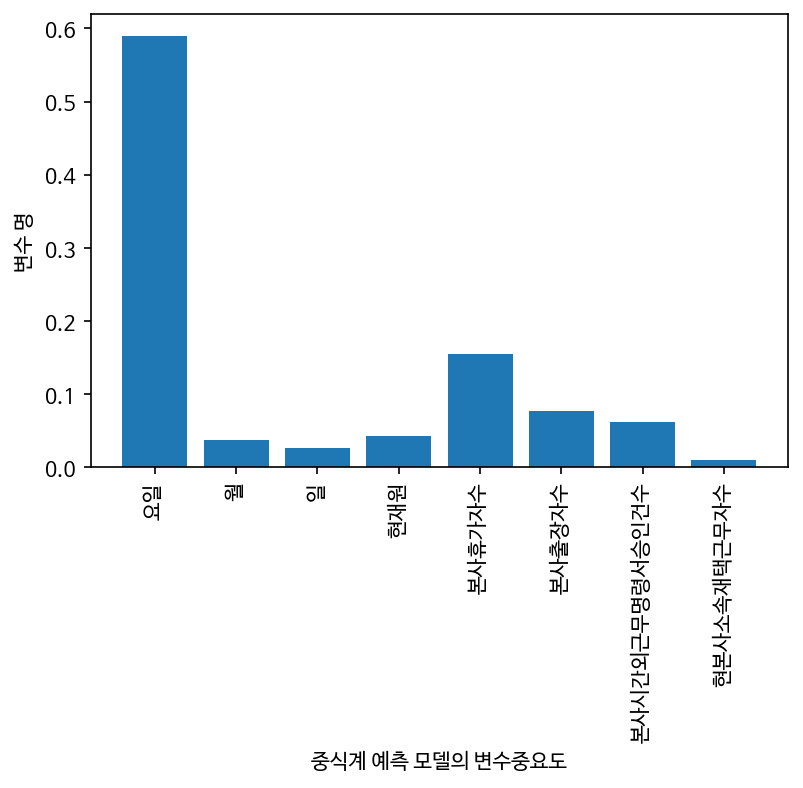

In [39]:
x = train[features].columns
y = lunch_model.feature_importances_

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.xlabel("중식계 예측 모델의 변수중요도")
plt.ylabel("변수 명")

plt.bar(x, y)
plt.show()

보기 좋지가 않네요

bar 막대 그래프 대신 barh 그래프를 사용하면 90도 회전된 그래프를 그릴 수 있습니다.

- barh 그래프 그리기

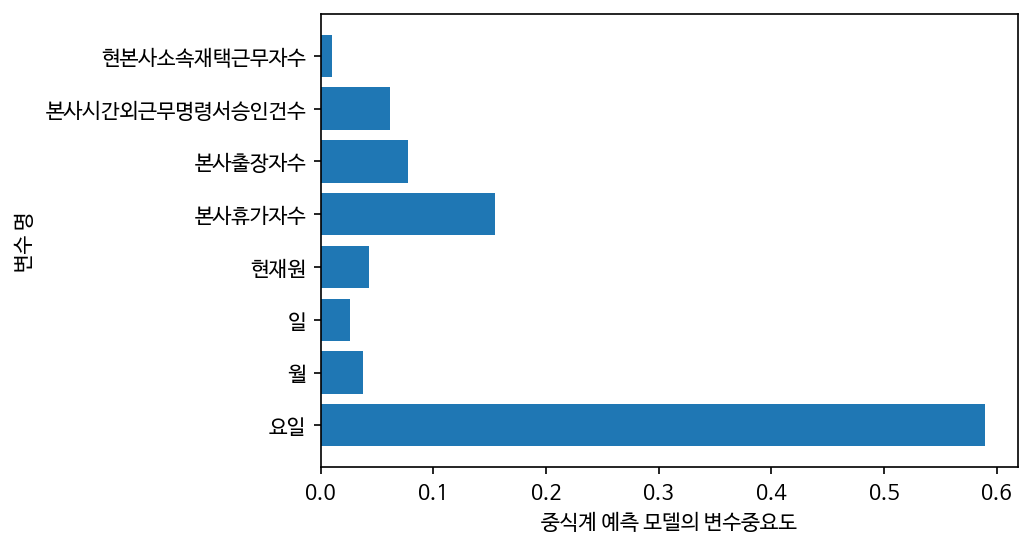

In [40]:
x = train[features].columns
y = lunch_model.feature_importances_

plt.figure(dpi=150)
# plt.xticks(rotation=90)

plt.xlabel("중식계 예측 모델의 변수중요도")
plt.ylabel("변수 명")

plt.barh(x, y)
plt.show()

훨씬 보기가 편해졌습니다!

또 요일 칼럼이 중식계 예측 모델에 중요한 역할이었다는 것을 알 수 있네요!

뒤이어 휴가자수, 출장자수, 시간외근무자수(=야근) 순으로 중식계 예측 모델에 중요하게 작용되었습니다. 

### 2) 석식계 변수중요도

In [41]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

석식계 예측 모델에는 features에 중식계가 사용되었으므로 추가해줍니다.

In [42]:
features.append("중식계")
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

중식계 변수중요도에서 feature_importances_() 함수를 소개했으니 바로 시각화로 넘어가겠습니다.

- 변수중요도 시각화

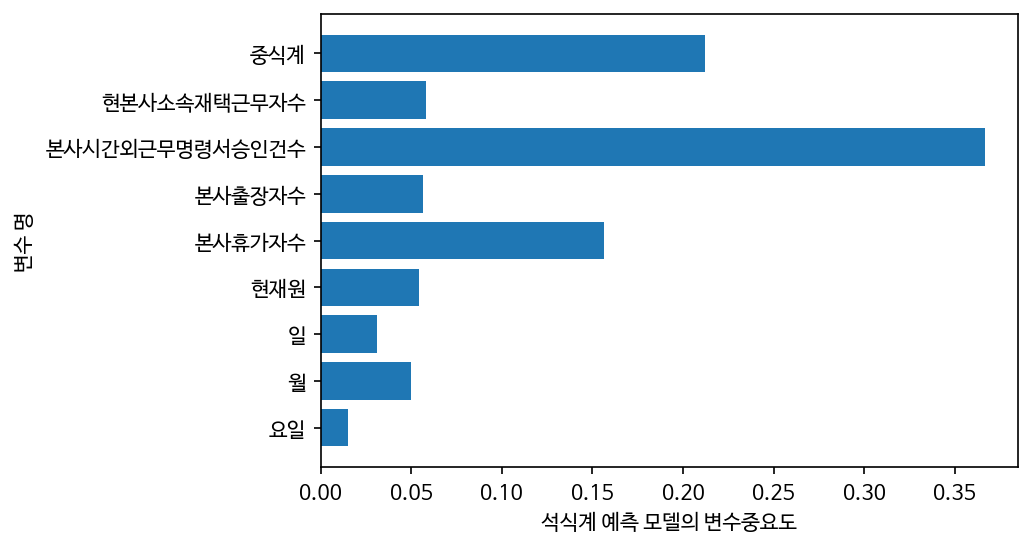

In [43]:
x = train[features].columns
y = dinner_model.feature_importances_

plt.figure(dpi=150)
# plt.xticks(rotation=90)

plt.xlabel("석식계 예측 모델의 변수중요도")
plt.ylabel("변수 명")

plt.barh(x, y)
plt.show()

시간외근무(=야근) 칼럼이 석식계 예측 모델에 중요한 역할이었다는 것을 알 수 있네요!

중식계 칼럼도 석식계 예측 모델에 영향력이 있네요. 

# <모델 선택, 모델 튜닝>

더 나은 성능을 위해서는 다음과 같은 방법이 존재합니다.
- 다양한 모델을 적용해보기
- (적용한 모델 중 가장 성능이 좋은) 모델 튜닝하기

## 1.데이터 다시 로드, 전처리

In [44]:
# train 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/구내식당/train.csv")

# test 데이터 불러오기
test = pd.read_csv("/content/drive/MyDrive/구내식당/test.csv")

# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")


- train 데이터 전처리
  - 석식 이용자 수가 0인 날 삭제
  - 요일 숫자로 변경  (월:1, 화:2, 수:3, 목:4, 금:5)
  - 일자 칼럼으로부터 월, 일 정보를 추출하여 새로운 칼럼 추가 (월 칼럼, 일 칼럼)
  - 현재원 칼럼 추가

In [45]:
# 석식 이용 인원 0인 날 삭제
train = train[train["석식계"] != 0]

# 요일 숫자로 변경
train.loc[train["요일"] == "월", "요일"] = 1
train.loc[train["요일"] == "화", "요일"] = 2
train.loc[train["요일"] == "수", "요일"] = 3
train.loc[train["요일"] == "목", "요일"] = 4
train.loc[train["요일"] == "금", "요일"] = 5

# 월 칼럼 추가
def month(text: str):
    return int(text[5:7])


train["월"] = train["일자"].map(month)

# 일 칼럼 추가
def day(text: str):
    return int(text[-2:])


train["일"] = train["일자"].map(day)

# 현재원 칼럼 추가
train["현재원"] = train["본사정원수"] - train["본사휴가자수"] - train["본사출장자수"] - train["현본사소속재택근무자수"]

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,현재원
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1,2401.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2,2378.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3,2365.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4,2277.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5,2142.0


- test 데이터 전처리
  - 요일 숫자로 변경  (월:1, 화:2, 수:3, 목:4, 금:5)
  - 일자 칼럼으로부터 월, 일 정보를 추출하여 새로운 칼럼 추가 (월 칼럼, 일 칼럼)
  - 현재원 칼럼 추가

In [46]:
# 요일 숫자로 변경
test.loc[test["요일"] == "월", "요일"] = 1
test.loc[test["요일"] == "화", "요일"] = 2
test.loc[test["요일"] == "수", "요일"] = 3
test.loc[test["요일"] == "목", "요일"] = 4
test.loc[test["요일"] == "금", "요일"] = 5

# 월 칼럼 추가
def month(text: str):
    return int(text[5:7])


test["월"] = test["일자"].map(month)

# 일 칼럼 추가
def day(text: str):
    return int(text[-2:])


test["일"] = test["일자"].map(day)

# 현재원 칼럼 추가
test["현재원"] = test["본사정원수"] - test["본사휴가자수"] - test["본사출장자수"] - test["현본사소속재택근무자수"]

test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,일,현재원
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1,27,2355.0
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1,28,2319.0
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1,29,2170.0
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2,1,2340.0
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2,2,2362.0


## 2.의사결정나무

  \<Study1>에서 다루었던 의사결정나무(DecisionTree) 모델입니다.

  -  **의사결정나무란?**

    의사결정나무는 여러가지 의사결정 규칙을 나무 구조(정확히는 나무를 뒤집어놓은 형태)로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석 방법입니다.  

    **간단히 요약하자면 아래 그림처럼 스무고개 방식으로 정답을 구하게 됩니다.**

    ![image](https://user-images.githubusercontent.com/91044039/169642941-97194b46-7810-4070-92fa-1e8174469dea.png)

### 1) 중식계 예측 모델

In [47]:
features = ["요일", "월", "일", "현재원", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수"]
train[features]

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,2,1,2401.0,50,150,238,0.0
1,2,2,2,2378.0,50,173,319,0.0
2,3,2,3,2365.0,56,180,111,0.0
3,4,2,4,2277.0,104,220,355,0.0
4,5,2,5,2142.0,278,181,34,0.0
...,...,...,...,...,...,...,...,...
1200,3,1,20,2319.0,75,198,4,391.0
1201,4,1,21,2309.0,92,231,462,351.0
1202,5,1,22,2177.0,255,248,1,303.0
1203,1,1,25,2396.0,107,153,616,327.0


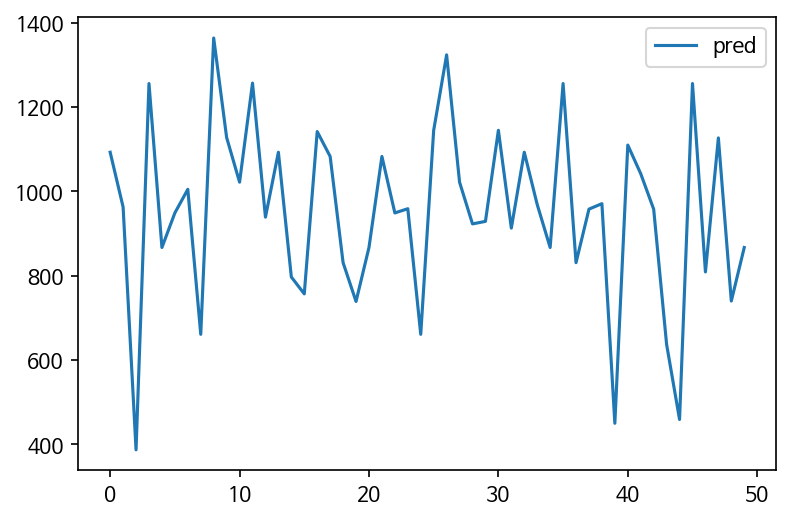

In [48]:
# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["중식계"]

# 1. 모델 정의
lunch_model = DecisionTreeRegressor()

# 2. 모델 학습
# fit() 메소드 이용
lunch_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)

plt.plot(lunch_count_predict, label="pred")
plt.legend()
plt.show()

### 2) 석식계 예측 모델

In [49]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [50]:
# features 변경 - 중식계 칼럼 추가
features.append("중식계")
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

In [51]:
test["중식계"] = lunch_count_predict
test[features]

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계
0,3,1,27,2355.0,88,182,5,358.0,1093.0
1,4,1,28,2319.0,104,212,409,348.0,963.0
2,5,1,29,2170.0,270,249,0,294.0,387.0
3,1,2,1,2340.0,108,154,538,322.0,1256.0
4,2,2,2,2362.0,62,186,455,314.0,867.0
5,3,2,3,2380.0,59,199,5,286.0,949.0
6,4,2,4,2364.0,61,211,476,288.0,1005.0
7,5,2,5,2247.0,169,252,0,256.0,661.0
8,1,2,8,2333.0,88,174,690,329.0,1364.0
9,2,2,9,2318.0,94,183,542,329.0,1128.0


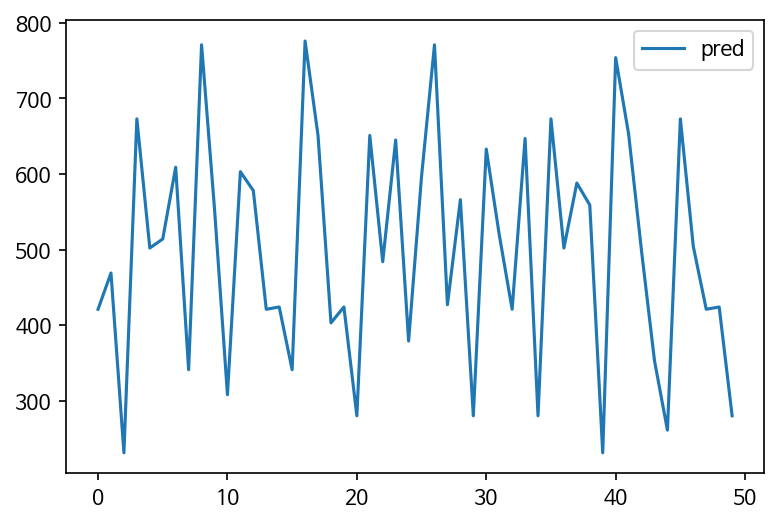

In [52]:
# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["석식계"]

# 1. 모델 정의
dinner_model = DecisionTreeRegressor()

# 2. 모델 학습
# fit() 메소드 이용
dinner_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
dinner_count_predict = dinner_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(dinner_count_predict, label="pred")
plt.legend()
plt.show()

### 3) 제출

\* 현재 위치에 존재하는 파일명과 동일한 이름의 파일 저장시 기존에 있던 파일은 사라진다는 점을 유의해주세요!

In [53]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

# 제출용 파일에 예측값 채워넣기
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict

# 제출파일 생성
submission.to_csv("submission.csv", index=False)

## 3.여러 모델 사용해보기 - 랜덤포레스트

이번에는 랜덤 포레스트 (Random Forest) 모델을 사용하여 분석을 진행하도록 하겠습니다.


**랜덤 포레스트란?**

<div align="center">
<img src="https://user-images.githubusercontent.com/49966189/179161260-c744f039-0223-43ec-aa4d-9ff270e682b8.png">
</div>
<div align="center">
<font color=gray> By Venkata Jagannath -
https://community.tibco.com/wiki/random-forest-template-tibco-spotfirer-wiki-page </font>
</div>

랜덤 포레스트는 대표적인 앙상블(ensemble) 모델의 일종입니다. "여러 개의 트리 모델" 에 "서로 다른 데이터"를 투입하여 나온 결과를 종합하여 가장 많은 투표(Voting)를 얻은 결과를 최종 결과로 선택하는 방식으로 작동합니다.

이를 통해 **과적합(Overfitting)을 방지**할 수 있고, 보다 일반화된 성능을 끌어낼 수 있습니다. 

랜덤 포레스트 모델은 `sklearn` 패키지를 이용해 간단하게 사용할 수 있습니다.

### 1) 중식계 예측 모델

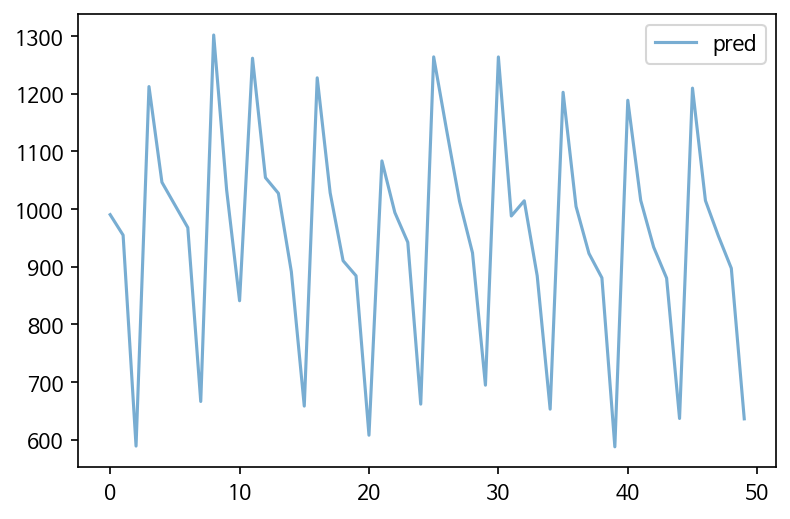

In [54]:
# 중식계 예측을 위한 features
features = features[:-1]

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["중식계"]

from sklearn.ensemble import RandomForestRegressor

# 1. 모델 정의
lunch_model = RandomForestRegressor()

# 2. 모델 학습
# fit() 메소드 이용
lunch_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(lunch_count_predict, alpha=0.6, label="pred")
plt.legend()
plt.show()

#### a) 랜덤포레스트 모델 시각화

In [55]:
lunch_model.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1097206578),
 DecisionTreeRegressor(max_features='auto', random_state=386285357),
 DecisionTreeRegressor(max_features='auto', random_state=1946968096),
 DecisionTreeRegressor(max_features='auto', random_state=644498542),
 DecisionTreeRegressor(max_features='auto', random_state=411043644),
 DecisionTreeRegressor(max_features='auto', random_state=1076322524),
 DecisionTreeRegressor(max_features='auto', random_state=1527692491),
 DecisionTreeRegressor(max_features='auto', random_state=750883395),
 DecisionTreeRegressor(max_features='auto', random_state=592610833),
 DecisionTreeRegressor(max_features='auto', random_state=525381469),
 DecisionTreeRegressor(max_features='auto', random_state=2076598343),
 DecisionTreeRegressor(max_features='auto', random_state=858405117),
 DecisionTreeRegressor(max_features='auto', random_state=130795544),
 DecisionTreeRegressor(max_features='auto', random_state=1650328702),
 DecisionTreeRegressor(max_f

- 랜덤포레스트의 의사결정 과정

  sklearn 라이브러리의 tree 모듈이 제공하는 export_graphviz() 함수를 사용하면 랜덤포레스트의 의사 결정 화면을 보여줍니다.



In [56]:
from sklearn.tree import export_graphviz

# lunch_model.estimators_의 인덱스 1에 해당하는 모델 선택
estimator = lunch_model.estimators_[1]

# dot파일 생성
export_graphviz(
    estimator, out_file="tree.dot", max_depth=3, precision=3, filled=True, rounded=True
)

# png로 바꾸기
from subprocess import call

call(["dot", "-Tpng", "tree.dot", "-o", "decision-tree.png", "-Gdpi=600"])

# png출력
from IPython.display import Image

Image(filename="decision-tree.png")

Output hidden; open in https://colab.research.google.com to view.

In [57]:
from sklearn.tree import export_graphviz

# lunch_model.estimators_의 인덱스 3에 해당하는 모델 선택
estimator = lunch_model.estimators_[3]

# dot파일 생성
export_graphviz(
    estimator, out_file="tree.dot", max_depth=3, precision=3, filled=True, rounded=True
)

# png로 바꾸기
from subprocess import call

call(["dot", "-Tpng", "tree.dot", "-o", "decision-tree.png", "-Gdpi=600"])

# png출력
from IPython.display import Image

Image(filename="decision-tree.png")

Output hidden; open in https://colab.research.google.com to view.

### 2) 석식계 예측 모델

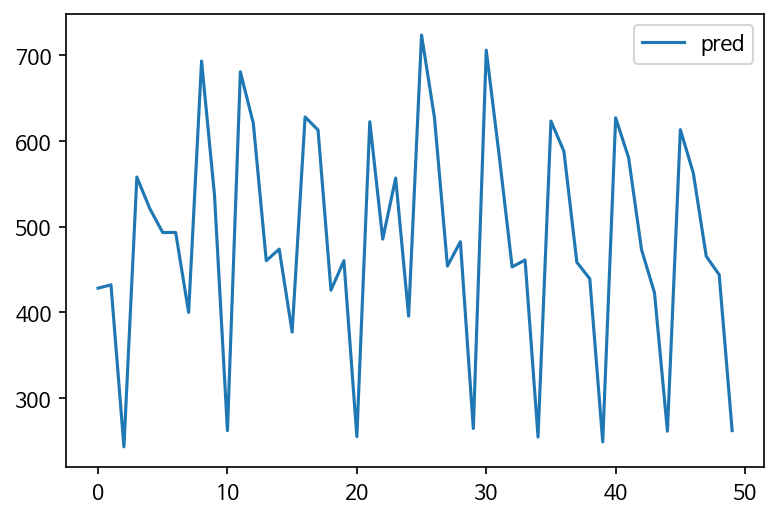

In [58]:
# 석식계 예측을 위한 features
features.append("중식계")

# test 데이터에 중식계 칼럼 추가 (예측값)
test["중식계"] = lunch_count_predict

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["석식계"]

# 1. 모델 정의
dinner_model = RandomForestRegressor()

# 2. 모델 학습
# fit() 메소드 이용
dinner_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
dinner_count_predict = dinner_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(dinner_count_predict, label="pred")
plt.legend()
plt.show()

### 3) 제출

\* 현재 위치에 존재하는 파일명과 동일한 이름의 파일 저장시 기존에 있던 파일은 사라진다는 점을 유의해주세요!

In [59]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

# 제출용 파일에 예측값 채워넣기
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict

# 제출파일 생성
submission.to_csv("submission.csv", index=False)

## 4.여러 모델 사용해보기 - 선형회귀

이번에는 선형회귀 (LinearRegression) 모델을 사용하여 분석을 진행하도록 하겠습니다.


**선형회귀란?**

<div align="center">
<img src="https://user-images.githubusercontent.com/65879567/189025169-45cd86e2-47e5-4698-936c-5424d43781bc.png">
</div>
<div align="center">
<font color=gray> 사진 출처 - https://velog.io/@changhtun1/python-선형-회귀-이론-및-실습 </font>
</div>

선형회귀 모델은 '회귀 계수(regression coefficient)를 선형 결합으로 표현할 수 있는 모델'을 말합니다.

지도 학습 알고리즘으로 주로 수치 예측 문제에 사용됩니다. 

즉 독립변수 X를 이용해서 수치형 종속변수 y를 예측합니다.

선형 모델은 파라미터가 선형식으로 표현하기 때문에 유연성이 떨어지지만, 파라미터를 추정하거나 모델을 해석할 때 비선형 모델에 비해 유리합니다.

선형회귀 모델도 `sklearn` 패키지를 이용해 사용할 수 있습니다.

### 1) 중식계 예측 모델

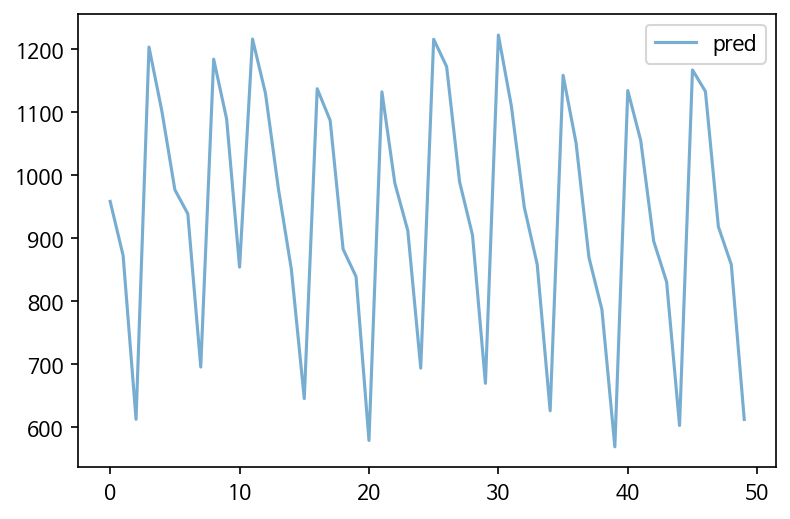

In [60]:
# 중식계 예측을 위한 features
features = features[:-1]

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["중식계"]

from sklearn.linear_model import LinearRegression

# 1. 모델 정의
lunch_model = LinearRegression()

# 2. 모델 학습
# fit() 메소드 이용
lunch_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(lunch_count_predict, alpha=0.6, label="pred")
plt.legend()
plt.show()

### 2) 석식계 예측 모델

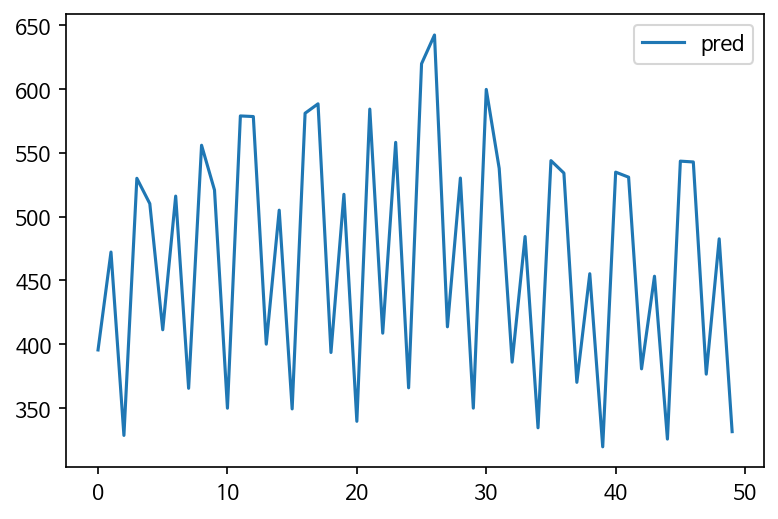

In [61]:
# 석식계 예측을 위한 features
features.append("중식계")

# test 데이터에 중식계 칼럼 추가 (예측값)
test["중식계"] = lunch_count_predict

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["석식계"]

# 1. 모델 정의
dinner_model = LinearRegression()

# 2. 모델 학습
# fit() 메소드 이용
dinner_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
dinner_count_predict = dinner_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(dinner_count_predict, label="pred")
plt.legend()
plt.show()

### 3) 제출

\* 현재 위치에 존재하는 파일명과 동일한 이름의 파일 저장시 기존에 있던 파일은 사라진다는 점을 유의해주세요!

In [62]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

# 제출용 파일에 예측값 채워넣기
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict

# 제출파일 생성
submission.to_csv("submission.csv", index=False)

## 5.하이퍼 파라미터 튜닝하기

성능이 가장 좋았던 RandomForestRegressor 모델의 하이퍼 파라미터를 튜닝하여 성능을 높여봅시다!

---

**하이퍼 파라미터란?**

하이퍼 파라미터(hyper parameter)는 모델링할 때 사용자가 직접 세팅해주는 값을 뜻합니다.

머신러닝 모델을 쓸 때 사용자가 직접 세팅해야 하는 값은 상당히 많은데 그 모든 값이 다 하이퍼 파라미터입니다.

  ex)
  - batch_size : 배치 크기
  - (training) epochs : 반복 학습 횟수
  - optimizer : 옵티마이저
  - learning rate : 학습률
  - activation functions : 활성화 함수

\* 하이퍼 파라미터는 정해진 최적의 값이 존재하지 않으며, 하이퍼 파라미터 설정에 따라 성능 변화에 큰 차이를 보이기도 합니다.


\* 하이퍼 파라미터와 혼용돼서 사용되는 **파라미터(parameter, 매개변수)**는 학습 과정에서 생성되는 변수를 말합니다. 다시 말해서 사용자가 임의로 설정하는 값이 아닙니다.

> 사용자가 직접 설정하면 **하이퍼 파라미터**, 모델 혹은 데이터에 의해 결정되면 **파라미터**입니다. 

---

RandomForestRegressor의 하이퍼 파라미터

- **n_estimators** : 결정트리의 개수(defalut=10)
- **criterion** : 분할된 것(split)의 품질을 측정하는 기능
- max_depth : 트리의 최대 깊이
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수

이외에도 랜덤포레스트 모델에는 다양한 하이퍼 파라미터가 존재합니다.

이번 하이퍼 파라미터 튜닝에서는 **n_estimators**와 **criterion**을 다룹니다.

[RandomForestRegressor의 하이퍼 파라미터 정보](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

### 1) 중식계 예측 모델



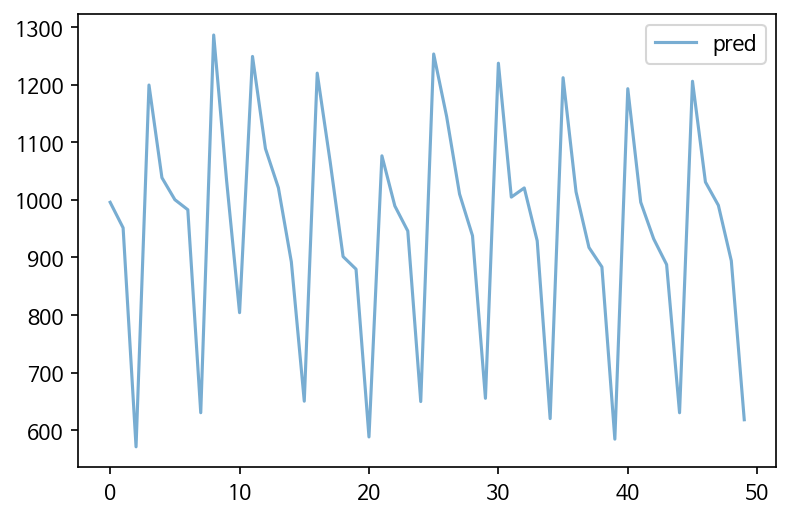

In [63]:
# 중식계 예측을 위한 features
features = features[:-1]

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["중식계"]

from sklearn.ensemble import RandomForestRegressor

# 1. 모델 정의
lunch_model = RandomForestRegressor(n_estimators=200, criterion="absolute_error")

# 2. 모델 학습
# fit() 메소드 이용
lunch_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(lunch_count_predict, alpha=0.6, label="pred")
plt.legend()
plt.show()

### 2) 석식계 예측 모델

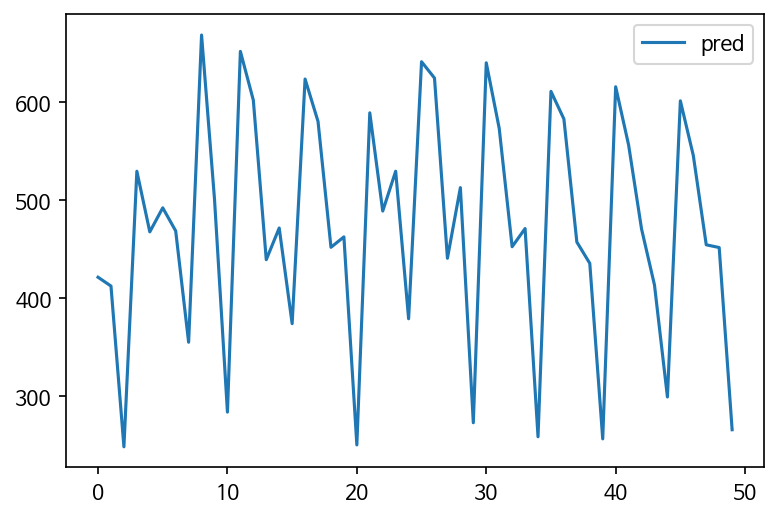

In [64]:
# 석식계 예측을 위한 features
features.append("중식계")

# test 데이터에 중식계 칼럼 추가 (예측값)
test["중식계"] = lunch_count_predict

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train["석식계"]

# 1. 모델 정의
dinner_model = RandomForestRegressor(n_estimators=200, criterion="absolute_error")

# 2. 모델 학습
# fit() 메소드 이용
dinner_model.fit(X, y)

# 3. 예측
# predict() 메소드 이용
dinner_count_predict = dinner_model.predict(test[features])

# 예측값 시각화
plt.figure(dpi=150)
plt.plot(dinner_count_predict, label="pred")
plt.legend()
plt.show()

### 3) 제출

\* 현재 위치에 존재하는 파일명과 동일한 이름의 파일 저장시 기존에 있던 파일은 사라진다는 점을 유의해주세요!

In [65]:
# sample_submission 데이터 불러오기
submission = pd.read_csv("/content/drive/MyDrive/구내식당/sample_submission.csv")

# 제출용 파일에 예측값 채워넣기
submission["중식계"] = lunch_count_predict
submission["석식계"] = dinner_count_predict

# 제출파일 생성
submission.to_csv("submission.csv", index=False)

## 6.데이콘 제출하기

이번 학습에서는 제출 파일 5개를 생성했습니다. 여러분은 어떤 파일을 제출해보셨나요??

[대회 페이지 바로가기](https://dacon.io/competitions/official/235997/overview/description)

이제 여러분만의 분석 방법으로 제출 파일을 생성해서 **[제출] 탭**에 제출해보세요!

제출 후 **[리더보드] 탭**으로 이동하면 자신의 순위가 어디인지 확인할 수 있습니다.

자신만의 코드를 통해 어디까지 올라갈 수 있는지, 함께 도전해봐요! :]

![image](https://user-images.githubusercontent.com/91044039/169643360-faddf389-ccbf-47ef-8634-46b75c1a17c2.png)


# \<텍스트 데이터 사용해보기>

**Level Up !!** 분석에 사용하지 않았던 메뉴 데이터를 다뤄봅시다!

- 중식메뉴에 계란찜이 있을까?

In [66]:
train["중식메뉴"][0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '

In [67]:
"계란찜" in train["중식메뉴"][0]

True

In [68]:
train["중식메뉴"][1]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) '

In [69]:
"계란찜" in train["중식메뉴"][1]

False

- 중식메뉴로 두루치기가 나올까?

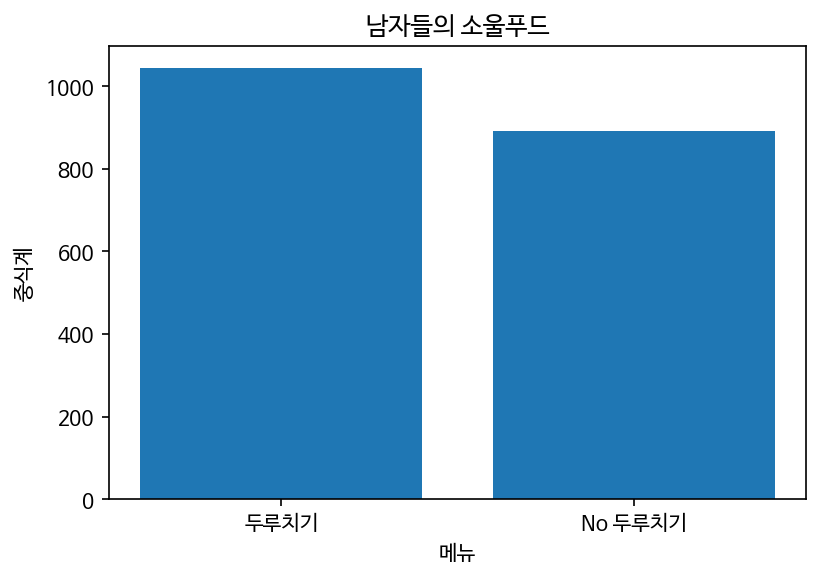

In [70]:
def find_something(text: str):
    if "두루치기" in text:
        return True
    else:
        return False


x = ["두루치기", "No 두루치기"]
y = [
    train[train["중식메뉴"].map(find_something)]["중식계"].mean(),
    train[~train["중식메뉴"].map(find_something)]["중식계"].mean(),
]
plt.figure(dpi=150)
plt.title("남자들의 소울푸드")
plt.xlabel("메뉴")
plt.ylabel("중식계")
plt.bar(x, y)
plt.show()

- 중식메뉴로 불고기가 나올까?

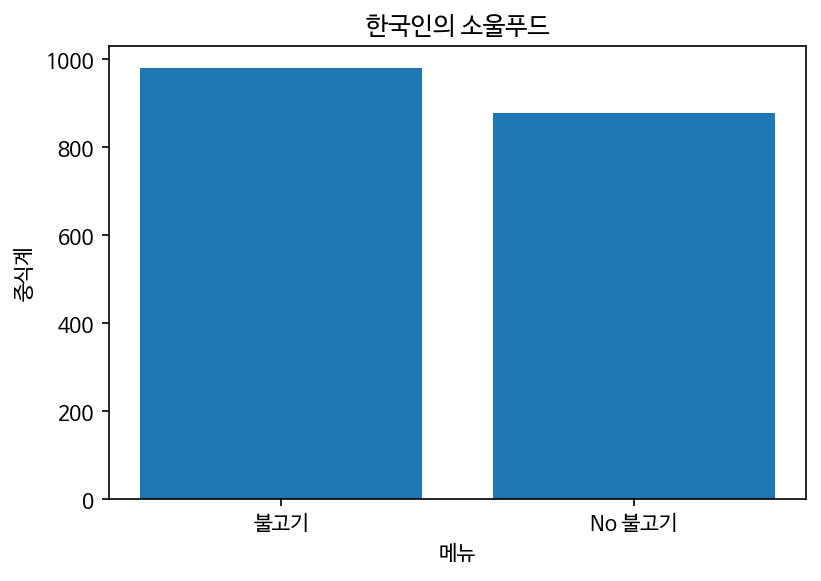

In [71]:
def find_something(text: str):
    if "불고기" in text:
        return True
    else:
        return False


x = ["불고기", "No 불고기"]
y = [
    train[train["중식메뉴"].map(find_something)]["중식계"].mean(),
    train[~train["중식메뉴"].map(find_something)]["중식계"].mean(),
]
plt.figure(dpi=150)
plt.title("한국인의 소울푸드")
plt.xlabel("메뉴")
plt.ylabel("중식계")
plt.bar(x, y)
plt.show()

- 중식메뉴로 파인애플볶음밥이 나올까?

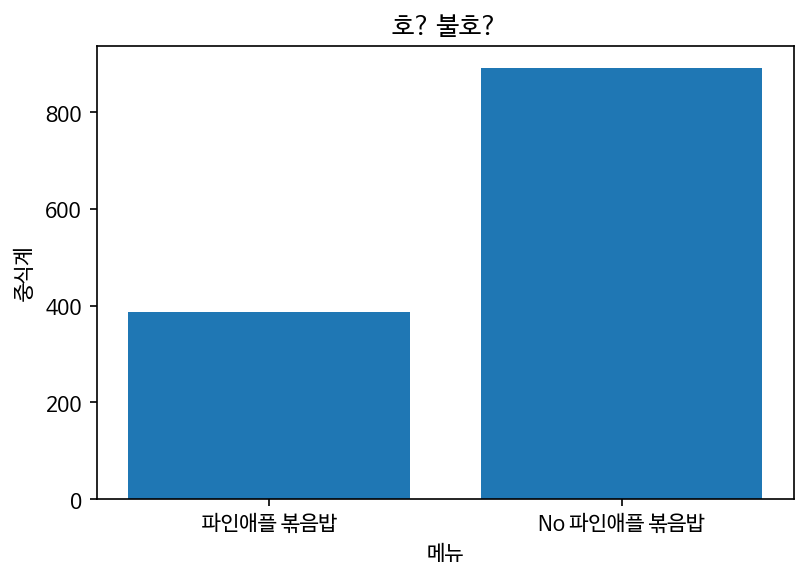

In [72]:
def find_something(text: str):
    if "파인애플볶음밥" in text:
        return True
    else:
        return False


x = ["파인애플 볶음밥", "No 파인애플 볶음밥"]
y = [
    train[train["중식메뉴"].map(find_something)]["중식계"].mean(),
    train[~train["중식메뉴"].map(find_something)]["중식계"].mean(),
]
plt.figure(dpi=150)
plt.title("호? 불호?")
plt.xlabel("메뉴")
plt.ylabel("중식계")
plt.bar(x, y)
plt.show()

- 중식메뉴로 닭볶음탕이 나올까?

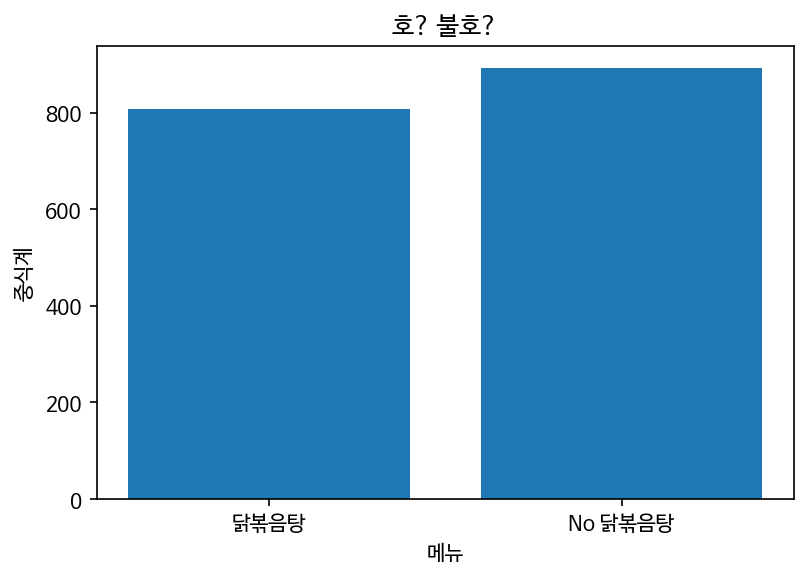

In [73]:
def find_something(text: str):
    if "닭볶음탕" in text:
        return True
    else:
        return False


x = ["닭볶음탕", "No 닭볶음탕"]
y = [
    train[train["중식메뉴"].map(find_something)]["중식계"].mean(),
    train[~train["중식메뉴"].map(find_something)]["중식계"].mean(),
]
plt.figure(dpi=150)
plt.title("호? 불호?")
plt.xlabel("메뉴")
plt.ylabel("중식계")
plt.bar(x, y)
plt.show()

메뉴 데이터는 분석에 사용하지 않았지만 메뉴 데이터로도 인사이트를 얻을 수 있지 않을까요?

여러분만의 인사이트를 도출해보세요 :]